# LABS 5 and 6 + data cleaning
### Processing Data
     X-y split.
    Normalize (numerical).
    One Hot/Label Encoding (categorical).
    Concat DataFrames
### Linear Regression
    Train-test split.
    Apply linear regression.
    Model Validation
### Description:
    R2.
    MSE.
    RMSE.
    MAE.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from scipy import stats
file = pd.read_csv("marketing_customer_analysis.csv")
file.columns = file.columns.str.lower().str.replace(" ","_")

In [2]:
display(file.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#X-y split.
y_dependent = file.total_claim_amount
numeric = file.select_dtypes('number')
x_independent = numeric.drop(columns = "total_claim_amount")
x_independent.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [4]:
columns = list(x_independent.columns)
print(columns)

['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


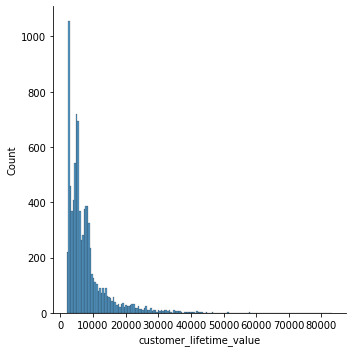

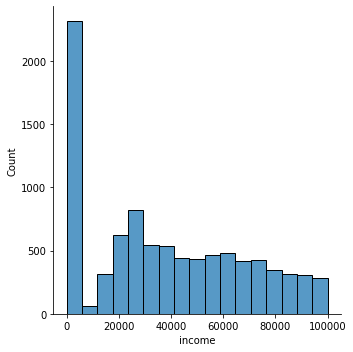

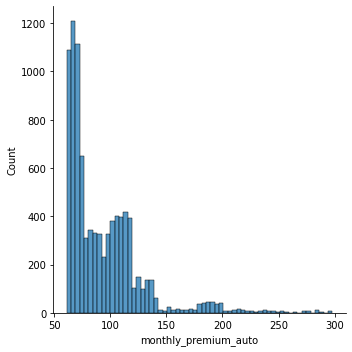

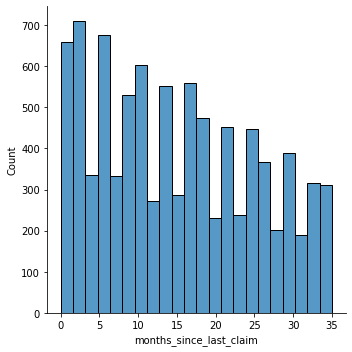

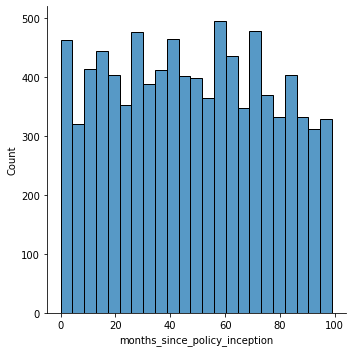

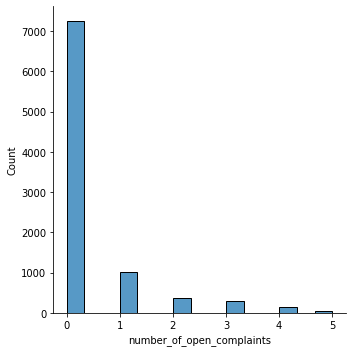

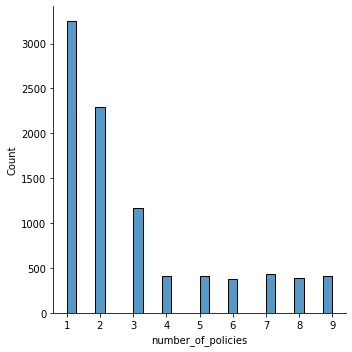

In [5]:
for col in columns:
    sns.displot(x_independent, x = col)
    plt.show()

In [6]:
# Normalize (numerical)
transformer = Normalizer().fit(x_independent)
x_normalized = transformer.transform(x_independent)
normalized_x_independent = pd.DataFrame(x_normalized)
normalized_x_independent.rename(columns = {0 : "customer_lifetime_value", 1: "income", 2: "monthly_premium_auto", 3: "months_since_last_claim", 4 : "months_since_policy_inception", 5: "number_of_open_complaints", 6: "number_of_policies"}, inplace=True)
normalized_x_independent.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


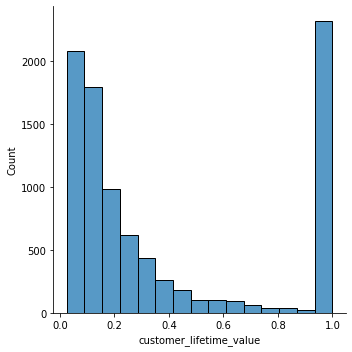

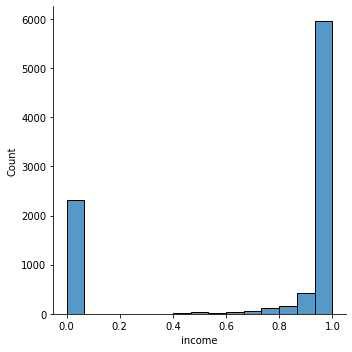

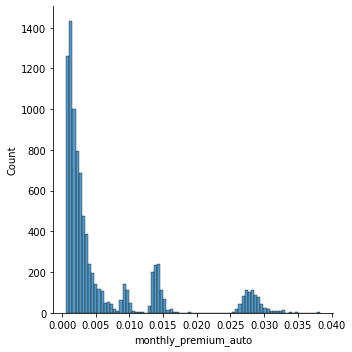

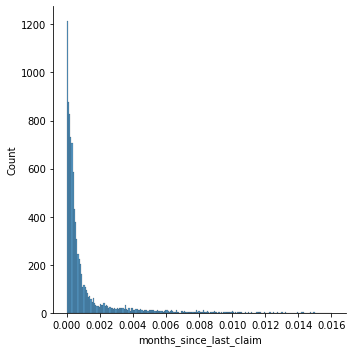

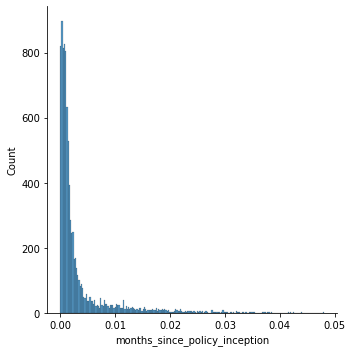

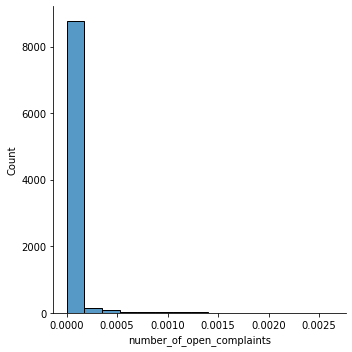

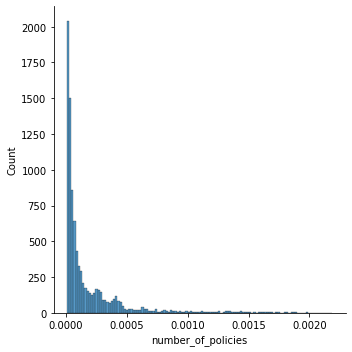

In [7]:
for col in list(normalized_x_independent.columns):
    sns.displot(normalized_x_independent, x = col)
    plt.show()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from scipy import stats
file = pd.read_csv("marketing_customer_analysis.csv")
file.columns = file.columns.str.lower().str.replace(" ","_")
file.rename(columns = {"employmentstatus" : "employment_status"}, inplace = True)
# normalized_x_independent - numerical normalized values without dependent

In [9]:
# data clean - dropping not useful columns
file.drop(columns = ["customer", "effective_to_date", "policy_type", "renew_offer_type"], inplace = True)

In [10]:
objects = file.select_dtypes(object)
dummy_objects = pd.get_dummies(objects)

In [11]:
y_dependent = pd.DataFrame(y_dependent)
super_data = pd.concat([normalized_x_independent, dummy_objects], axis = 1)
super_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_Arizona,state_California,state_Nevada,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(super_data, y_dependent, test_size=0.3, random_state=100)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test,predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print(f"MSE: {mse} \nR2: {r2} \nRMSE : {rmse}\nMAE: {mae}")

MSE: 18706.256042145124 
R2: 0.765685639788671 
RMSE : 136.7708157544771
MAE: 98.03134612367748


# Improving the performance of the model

### Checking correlation matrix and removing irrelevant features

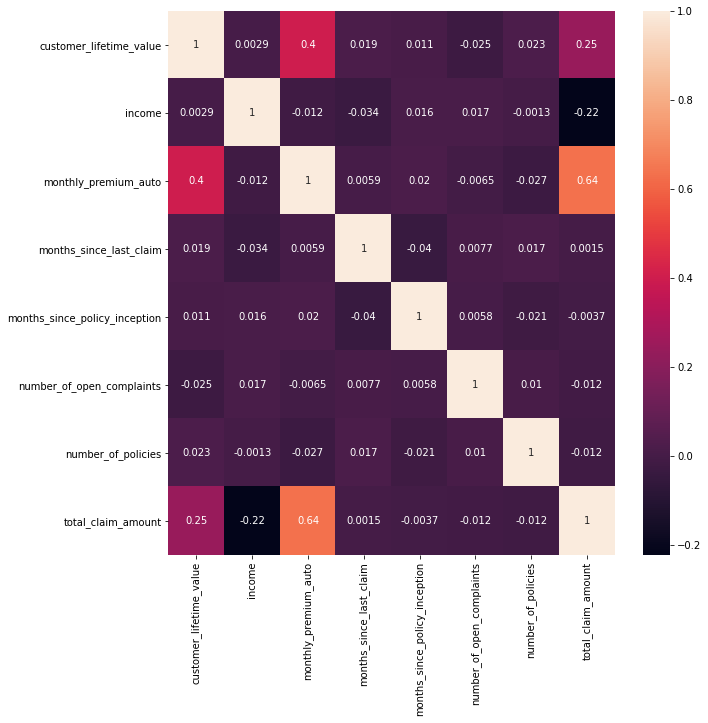

In [13]:
# Plot Pearson Correlation Heatmap.
pearson_corr_matrix = income_non_zero.corr()
fig, ax = plt.subplots(figsize = (10,10))c
ax = sns.heatmap(pearson_corr_matrix, annot = True)
plt.show()

#### The heatmap has shown, that the dependent variable highly correlates with columns Customer Lifetime Value and Monthly Premium Auto. But, the latter values also highly correlate, so I can discard one of them and deal with only one numerical column - Monthly Premium Auto. 

In [14]:
y_dependent = file["total_claim_amount"]
x_numerical_independent = file["monthly_premium_auto"]

### Dummification of the categorical values

In [15]:
objects_dummyfied = pd.get_dummies(object_columns)
display(objects_dummyfied.head())

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


### Concatenating numerical and categorical variables to get a full set of independent values.

In [16]:
x_independent = pd.concat([objects_dummyfied, x_numerical_independent], axis = 1)

### Splitting into train set and test set.

In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_independent, y_dependent, test_size=0.3, random_state=100)

# Modeling and Model Validation

In [18]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test,predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print(f"MSE: {mse} \nR2: {r2} \nRMSE : {rmse}\nMAE: {mae}")

MSE: 17867.184412399303 
R2: 0.7761958419185047 
RMSE : 133.66818773514998
MAE: 94.69971215040646


### Error metrics of the first model:
    MSE: 18706.256042145124 
    R2: 0.765685639788671 
    RMSE : 136.7708157544771
    MAE: 98.03134612367748
### Error metrics of the second model:
    MSE: 17867.184412399303 
    R2: 0.7761958419185047 
    RMSE : 133.66818773514998
    MAE: 94.69971215040646

## Conclusion: the performance of the model was improved by removing excess numerical values.